<a href="https://colab.research.google.com/github/Pragya1712/Machine-Learning-Hand-Code/blob/main/Bias_and_Variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
np.random.seed(1)

In [ ]:
x = np.linspace(0,10,100).reshape(-1,1)
y=2*x + 0.5*x**2+np.random.normal(0,5,size=x.shape)

x_train,x_,y_train,y_ = train_test_split(x,y,test_size= 0.4,random_state=1)
x_cv,x_test,y_cv,y_test = train_test_split(x_,y_,test_size=0.5,random_state=1)
print(x_train.shape,y_train.shape)
print(x_cv.shape,y_cv.shape)
print(x_test.shape,y_test.shape)

(60, 1) (60, 1)
(20, 1) (20, 1)
(20, 1) (20, 1)


In [ ]:
# Polynomial regression
train_mse =[]
cv_mse =[]
degrees = range(1,11)
for degree in degrees:
  poly = PolynomialFeatures(degree = degree,include_bias = False)
  X_train = poly.fit_transform(x_train)
  X_cv = poly.fit_transform(x_cv)
  scaler = StandardScaler()
  x_train_poly = scaler.fit_transform(X_train)
  x_cv_poly = scaler.fit_transform(X_cv)
  model = LinearRegression()
  model.fit(x_train_poly,y_train)
  train_mse.append(mean_squared_error(y_train,model.predict(x_train_poly)))
  cv_mse.append(mean_squared_error(y_cv,model.predict(x_cv_poly)))

print(train_mse)
print(cv_mse)



[32.88220453833402, 23.288468999074276, 23.164357025512018, 22.993971424323927, 22.48082318940817, 22.437115947893055, 21.216729861909663, 21.19642113579522, 21.18701781312051, 21.161218898748476]
[27.65743779354147, 20.338775240518792, 20.27787861222434, 20.604528477921153, 21.6519656372354, 21.39649443652341, 22.964366196341597, 22.710905409806166, 22.70003679274883, 22.549659236770886]


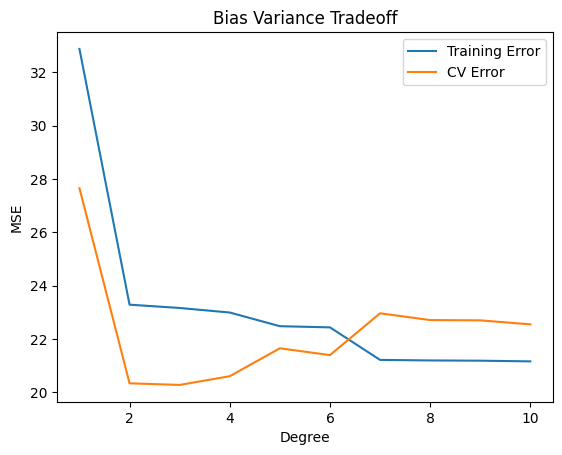

In [ ]:
# Plotting
plt.plot(degrees,train_mse,label="Training Error")
plt.plot(degrees,cv_mse,label="CV Error")
plt.xlabel("Degree")
plt.ylabel("MSE")
plt.title("Bias Variance Tradeoff")
plt.legend()
plt.show()

In [ ]:
# Regularization (Ridge)
lambdas = [0.1,0.01,5,10,1,2]
cv_errors=[]
degree = 4
poly = PolynomialFeatures(degree = degree,include_bias = False)
X_train = poly.fit_transform(x_train)
X_cv = poly.fit_transform(x_cv)
scaler = StandardScaler()
x_train_poly = scaler.fit_transform(X_train)
x_cv_poly = scaler.fit_transform(X_cv)
for l in lambdas:
  model = Ridge(alpha=l)
  model.fit(x_train_poly,y_train)
  cv_errors.append(mean_squared_error(y_cv,model.predict(x_cv_poly)))
print(cv_errors)

[20.196820830681837, 20.282138256354003, 17.747076524452265, 16.488883433116136, 19.631273661347073, 19.02270943036886]


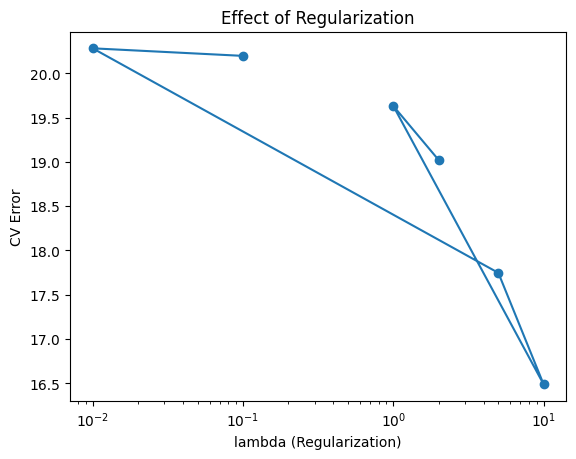

In [ ]:
# Plotting
plt.plot(lambdas,cv_errors,marker='o')
plt.xlabel("lambda (Regularization)")
plt.ylabel("CV Error")
plt.title("Effect of Regularization")
plt.xscale("log")
plt.show()


In [ ]:
train_error = []
cv_error = []
poly = PolynomialFeatures(degree =4,include_bias=False)
for m in range(10,len(x_train),10):
  X_train_m = poly.fit_transform(x_train[:m])
  X_cv_m = poly.fit_transform(x_cv)
  scaler = StandardScaler()
  x_train_poly = scaler.fit_transform(X_train_m)
  x_cv_poly = scaler.fit_transform(X_cv_m)
  model = LinearRegression()
  model.fit(X_train_m,y_train[:m])
  train_error.append(mean_squared_error(y_train[:m],model.predict(X_train_m)/2))
  cv_error.append(mean_squared_error(y_cv,model.predict(X_cv_m)/2))

print(train_error)
print(cv_error)

[433.3659126727131, 335.553982153899, 342.0469216727451, 342.7226676711099, 299.6229991918029]
[266.48451116000734, 244.29520934956594, 246.47077527849578, 238.20487781377034, 245.8435163578632]


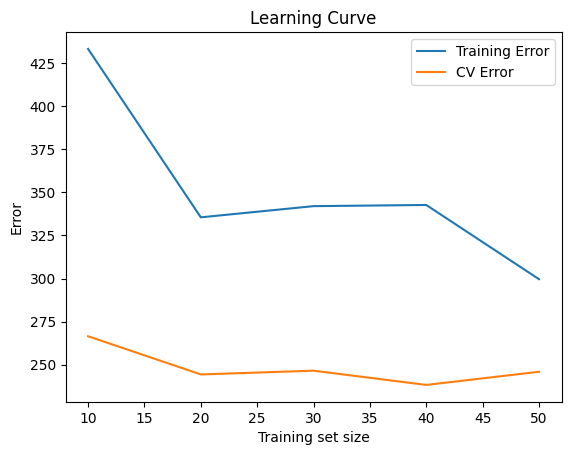

In [ ]:
plt.plot(range(10,len(x_train),10),train_error,label="Training Error")
plt.plot(range(10,len(x_train),10),cv_error,label="CV Error")
plt.xlabel("Training set size")
plt.ylabel("Error")
plt.title("Learning Curve")
plt.legend()
plt.show()